<a href="https://colab.research.google.com/github/shilpashreshta/Data_Science_projects/blob/Employee_Attribution_Prediction/Employee_Attrition_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPLOYEE ATTRITION PREDICTION

In [1]:
# Import Python Lybraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Read the data

In [2]:
#Read the file into a dataframe
df= pd.read_csv(r'https://raw.githubusercontent.com/shilpashreshta/Data_Science_projects/refs/heads/Employee_Attribution_Prediction/Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#all columns not visible above, so ...
pd.set_option('display.max_columns',None)

##Exploratory Data Analysis

In [4]:
#shape of data
df.shape

(1470, 35)

In [5]:
#check if any columns have null values
df.isnull().any()

,0
Age,False
Attrition,False
BusinessTravel,False
DailyRate,False
Department,False
DistanceFromHome,False
Education,False
EducationField,False
EmployeeCount,False
EmployeeNumber,False


In [6]:
#check if any column has single value entirely
uniq_val= {col: df[col].unique() for col in df.columns}
for col,values in uniq_val.items():
    print(f"{col},: ,{values}")

Age,: ,[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition,: ,['Yes' 'No']
BusinessTravel,: ,['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate,: ,[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  1

In [7]:
#Drop the columns having single values entirely: EmployeeCount, StandardHours, Over18
df1=df.drop(['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'],axis=1)

In [8]:
#check for na values
df1.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [9]:
#check for null values
df1.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [11]:
#check for statistical details
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
#check for datatypes
#df1.select_dtypes(include='object').columns
for col in df1.columns:
  if df1[col].dtype==object:
    print(str(col)+': '+str(df1[col].unique()))
    print(df1[col].value_counts())
    print('--------------------------------------------------')


Attrition: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------
Gender: ['Female' 'Male']
Gender
Male      882


In [13]:
#check and drop duplicates if any
df1.drop_duplicates(inplace=True)

In [14]:
#check if the data is balanced
df1['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


<Axes: xlabel='count', ylabel='Attrition'>

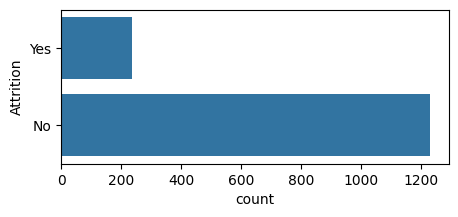

In [15]:
#viewing the imbalance in the data
plt.figure(figsize=(5,2))
sns.countplot(y='Attrition',data=df1)

<Axes: xlabel='Age', ylabel='count'>

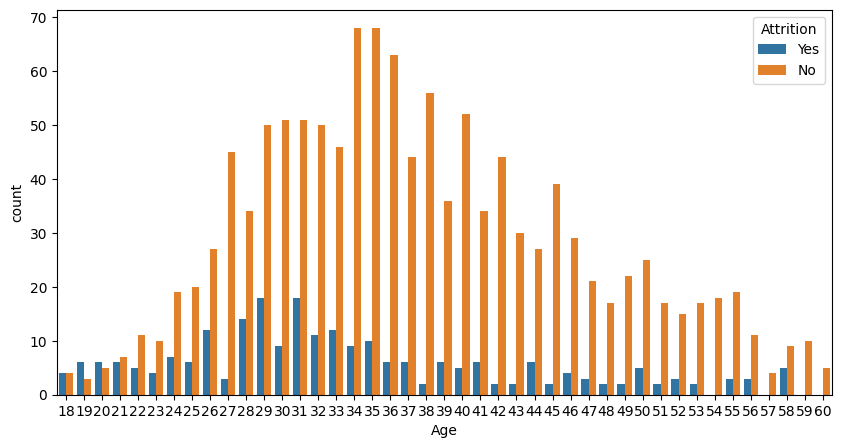

In [16]:
# relation of Age with Attrition
plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue='Attrition',data=df1)

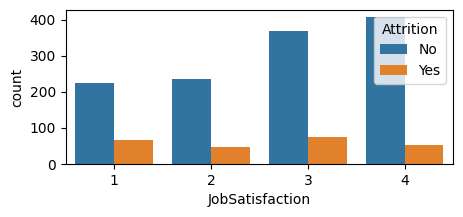

In [17]:
# relation of JobSatisfaction with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df1)
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='count'>

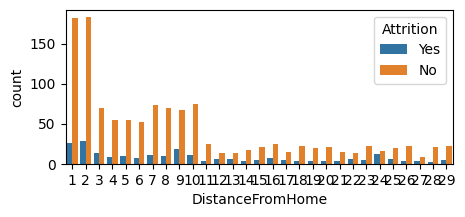

In [18]:
# relation of DistanceFromHome with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='DistanceFromHome',hue='Attrition',data=df1)

<Axes: xlabel='OverTime', ylabel='count'>

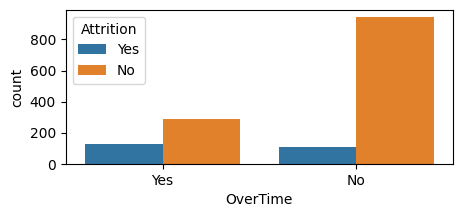

In [19]:
# relation of OverTime with Attrition seems strong

plt.figure(figsize=(5,2))
sns.countplot(x='OverTime',hue='Attrition',data=df1)

<Axes: xlabel='Gender', ylabel='count'>

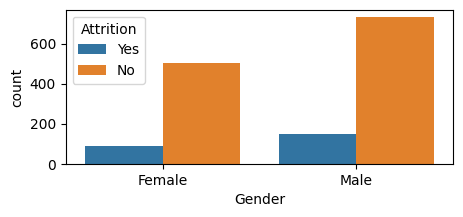

In [20]:
# relation of Gender with Attrition seems unbiased

plt.figure(figsize=(5,2))
sns.countplot(x='Gender',hue='Attrition',data=df1)

<Axes: xlabel='JobLevel', ylabel='count'>

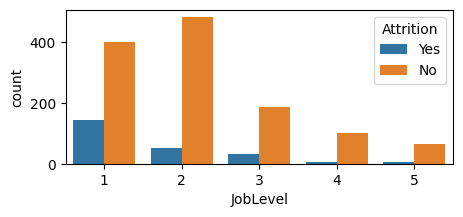

In [21]:
# relation of JobLevel with Attrition seems direct

plt.figure(figsize=(5,2))
sns.countplot(x='JobLevel',hue='Attrition',data=df1)

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

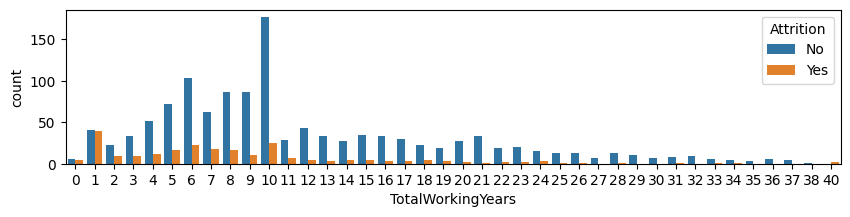

In [22]:
# relation of TotalWorkingYears with Attrition

plt.figure(figsize=(10,2))
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df1)

<Axes: xlabel='MaritalStatus', ylabel='count'>

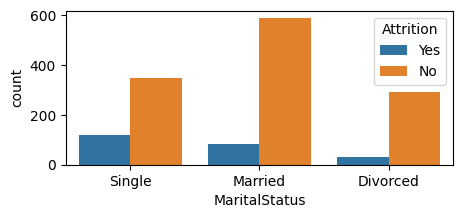

In [23]:
# relation of MaritalStatus with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df1)

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

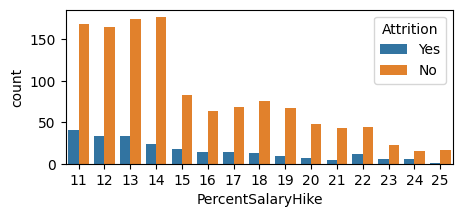

In [24]:
# relation of PercentSalaryHike with Attrition seems direct

plt.figure(figsize=(5,2))
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df1)

<Axes: xlabel='MonthlyIncome', ylabel='count'>

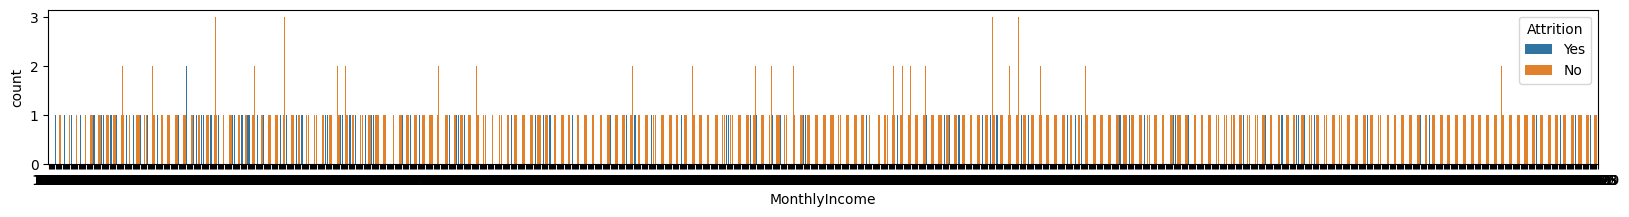

In [25]:
# relation of MonthlyIncome with Attrition

plt.figure(figsize=(20,2))
sns.countplot(x='MonthlyIncome',hue='Attrition',data=df1)

<Axes: >

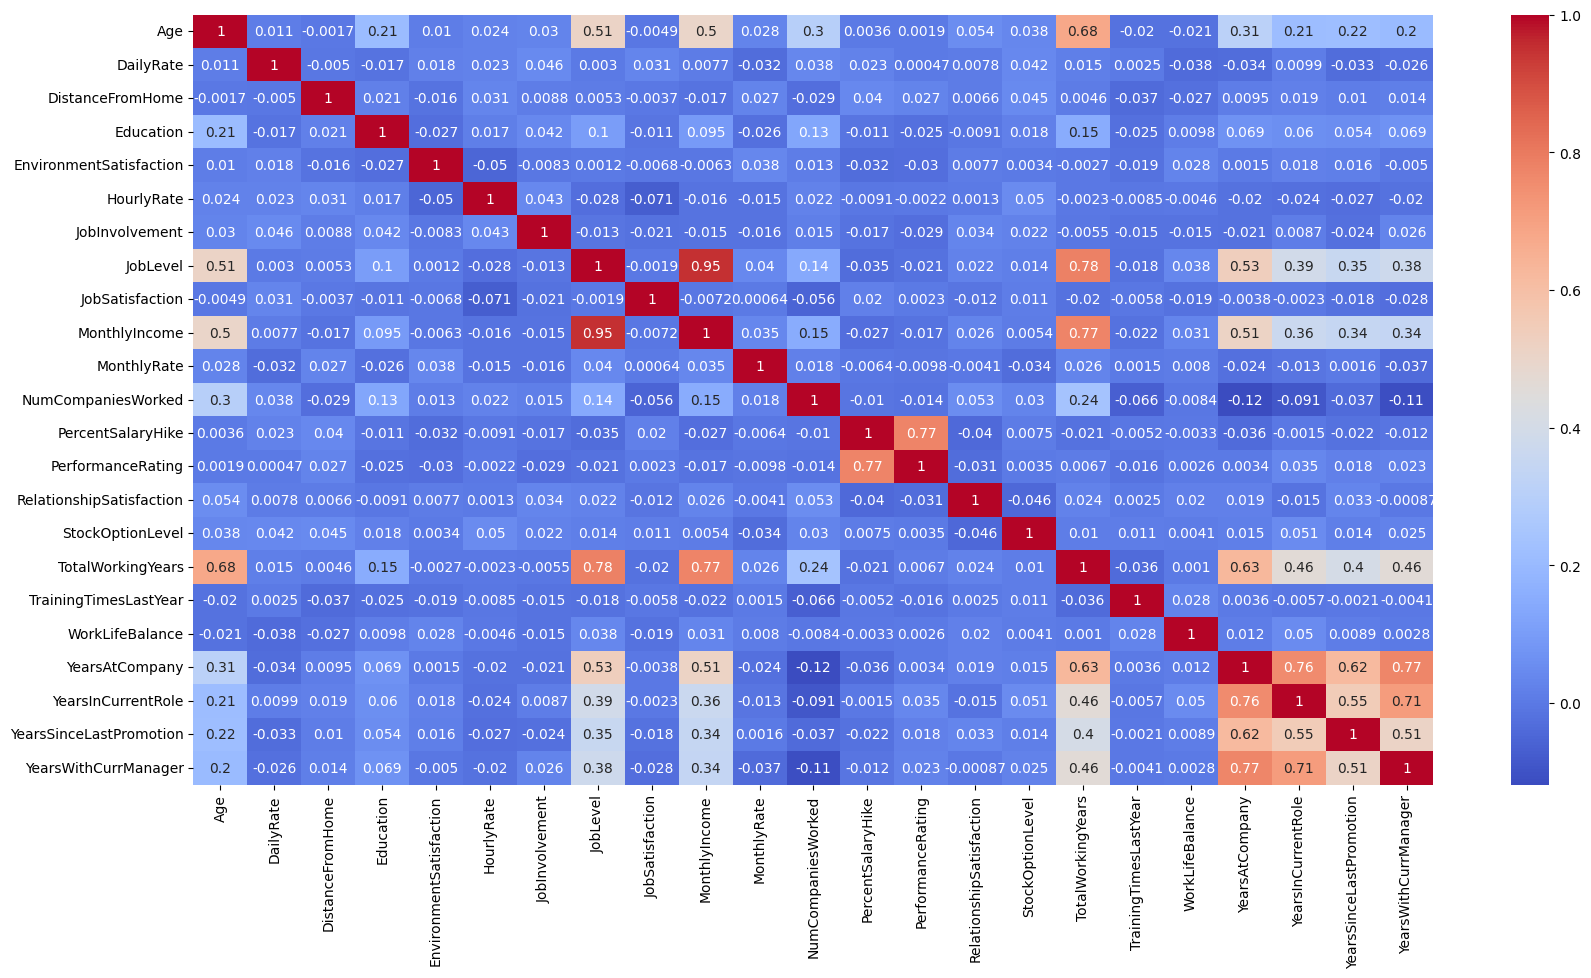

In [26]:
#correlation between features
plt.figure(figsize=(20,10))
num_df1= df1.select_dtypes(include='number')
sns.heatmap(num_df1.corr(),annot=True,cmap='coolwarm')

##Label Encoding

In [27]:
#Target variable encoding
df1['Attrition']=df1['Attrition'].map({'Yes' :1,'No' :0})

In [28]:
#Find the categorical columns
obj_col=df1.select_dtypes(include='object').columns
obj_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [29]:
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for col in obj_col:
  df1[col]=encoder.fit_transform(df1[col])

In [30]:
# Separate features (x) and target (y)
x = df1.drop('Attrition', axis=1)
y = df1['Attrition']

In [31]:
# Find if there’s a linear relationship between the independent variables (features)
# and the log-odds of the dependent variable ('Attrition')

import statsmodels.api as sm

# Add a constant to the independent variables (required for statsmodels)
x = sm.add_constant(x)

# Fit the logistic regression model
logit_model = sm.Logit(y, x)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.318505
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           30
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.2789
Time:                        11:29:18   Log-Likelihood:                -468.20
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.144e-58
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8448      1.265      2.249      0.024       0.366


Conclusion from Logit model: Logistic Regression fits:
*   The model has identified several significant predictors of employee attrition, such as Age, DistanceFromHome, JobInvolvement, MaritalStatus, OverTime, and YearsSinceLastPromotion.
*   Some predictors, like OverTime and DistanceFromHome, have a strong influence on the likelihood of attrition.
*   The model shows a reasonable fit (pseudo R-squared of 0.2789),

## Splitting the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=10)

## Apply RandomOverSampler to balance the training data

In [33]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to balance the training data
ros= RandomOverSampler(random_state=10)
x_train_ros, y_train_ros= ros.fit_resample(x_train, y_train)

# Print the class distribution before and after oversampling
print("Class distribution before oversampling:", Counter(y_train))
print("Class distribution after oversampling:", Counter(y_train_ros))

Class distribution before oversampling: Counter({0: 994, 1: 182})
Class distribution after oversampling: Counter({0: 994, 1: 994})


##Scale the features

In [34]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler= StandardScaler()
x_train_ros= scaler.fit_transform(x_train_ros)
x_test= scaler.transform(x_test)

##Initiate the LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression

# Train the logisticRegression model
model= LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_ros, y_train_ros)

# Predict on test set
y_pred= model.predict(x_test)

## Evaluate the model

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[188  51]
 [ 12  43]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       239
           1       0.46      0.78      0.58        55

    accuracy                           0.79       294
   macro avg       0.70      0.78      0.72       294
weighted avg       0.85      0.79      0.80       294



##Further tuning your logistic regression model

In [37]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Find optimal threshold based on Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

# Apply optimal threshold
y_pred_tuned = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model with tuned threshold
print("Evaluation with tuned threshold:")
print(confusion_matrix(y_test, y_pred_tuned))
print(accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Further tuning: L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000, random_state=42) # Adjust C for regularization strength
model_l1.fit(x_train_ros, y_train_ros)
y_pred_l1 = model_l1.predict(x_test)

print("\nEvaluation with L1 regularization:")
print(confusion_matrix(y_test, y_pred_l1))
print(accuracy_score(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))

# Further tuning: L2 regularization
model_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)  # Adjust C
model_l2.fit(x_train_ros, y_train_ros)
y_pred_l2 = model_l2.predict(x_test)

print("\nEvaluation with L2 regularization:")
print(confusion_matrix(y_test, y_pred_l2))
print(accuracy_score(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l2))

Optimal threshold: 0.5140954944994794
Evaluation with tuned threshold:
[[191  48]
 [ 12  43]]
0.7959183673469388
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       239
           1       0.47      0.78      0.59        55

    accuracy                           0.80       294
   macro avg       0.71      0.79      0.73       294
weighted avg       0.85      0.80      0.81       294


Evaluation with L1 regularization:
[[184  55]
 [ 12  43]]
0.7721088435374149
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       239
           1       0.44      0.78      0.56        55

    accuracy                           0.77       294
   macro avg       0.69      0.78      0.70       294
weighted avg       0.85      0.77      0.79       294


Evaluation with L2 regularization:
[[186  53]
 [ 13  42]]
0.7755102040816326
              precision    recall  f1-score   support

           0       0.9

##Tuned Threshold (0.5141): Achieves the highest accuracy (80%), precision (0.47), and F1-score (0.59) for the minority class. The recall remains high (0.78).

##Finding the best fit model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lis=[LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, KNeighborsClassifier]
for modl in lis:
  print(modl.__name__)
  print(cross_val_score(modl(),x_train_ros,y_train_ros,cv=5).mean())
  mod=modl()
  mod.fit(x_train_ros,y_train_ros)
  y_test_pred= mod.predict(x_test)
  print(accuracy_score(y_test,y_test_pred))
  print("_______________________________________________________")

LogisticRegression
0.7535372074478184
0.7857142857142857
_______________________________________________________
DecisionTreeClassifier
0.9220422009290786
0.7687074829931972
_______________________________________________________
RandomForestClassifier
0.9823943394554636
0.8435374149659864
_______________________________________________________
SVC
0.9129868486006861
0.8605442176870748
_______________________________________________________
KNeighborsClassifier
0.834001240459223
0.7482993197278912
_______________________________________________________


##Finding the best parameters for the RandomForestClassifier

In [50]:
from sklearn.model_selection import RandomizedSearchCV

params ={'n_estimators': [10,20,30,40],
         'max_depth': [100,200,300,400],
         'min_samples_split': [4,6,8,10],
         'random_state': [10,20,30,40]}
grid= RandomizedSearchCV(RandomForestClassifier(),param_distributions= params,cv=5,n_iter=10)
grid.fit(x_train_ros,y_train_ros)
print(grid.best_params_)
print(grid.best_score_)

{'random_state': 30, 'n_estimators': 40, 'min_samples_split': 8, 'max_depth': 100}
0.9753515689277622


##Use the best parameters in best model
Best parameters: {'random_state': 30, 'n_estimators': 40, min_samples_split': 8, 'max_depth': 100}
Best score= 0.9753515689277622

In [51]:
rf=RandomForestClassifier(random_state=30,n_estimators=40,min_samples_split=8,max_depth=100)
rf.fit(x_train_ros,y_train_ros)
y_test_pred= rf.predict(x_test)
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       239
           1       0.67      0.22      0.33        55

    accuracy                           0.83       294
   macro avg       0.76      0.60      0.62       294
weighted avg       0.81      0.83      0.80       294

